In [14]:
!pip install pandas_datareader
!pip install matplotlib
!pip install numpy
!pip install pandas

In [15]:
import pandas_datareader.data as pdr
import numpy as np
import datetime
import statsmodels.api as sm

In [16]:
# Download historical data for required stocks
ticker = "AAPL"
ohlcv = pdr.get_data_yahoo(ticker,datetime.date.today()-datetime.timedelta(364),datetime.date.today())

In [17]:
ohlcv.shape

(251, 6)

In [18]:
ohlcv.head(4)

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2018-12-20,162.110001,155.300003,160.399994,156.830002,64773000.0,154.508499
2018-12-21,158.160004,149.630005,156.860001,150.729996,95744600.0,148.498795
2018-12-24,151.550003,146.589996,148.149994,146.830002,37169200.0,144.656540
2018-12-26,157.229996,146.720001,148.300003,157.169998,58582500.0,154.843475


In [19]:
ohlcv.tail(4)

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-12-13,275.299988,270.929993,271.459991,275.149994,33396900.0,275.149994
2019-12-16,280.790009,276.980011,277.000000,279.859985,32046500.0,279.859985
2019-12-17,281.769989,278.799988,279.570007,280.410004,28539600.0,280.410004
2019-12-18,281.899994,279.119995,279.799988,279.739990,29007100.0,279.739990


In [20]:
def slope(ser,n):
    "function to calculate the slope of n consecutive points on a plot"
    slopes = [i*0 for i in range(n-1)]
    for i in range(n,len(ser)+1):
        y = ser[i-n:i]
        x = np.array(range(n))
        y_scaled = (y - y.min())/(y.max() - y.min())
        x_scaled = (x - x.min())/(x.max() - x.min())
        x_scaled = sm.add_constant(x_scaled)
        model = sm.OLS(y_scaled,x_scaled)
        results = model.fit()
        slopes.append(results.params[-1])
    slope_angle = (np.rad2deg(np.arctan(np.array(slopes))))
    return np.array(slope_angle)

In [21]:
df = ohlcv.copy()

In [22]:
df['slope'] = slope(ohlcv['Adj Close'], 5)

In [23]:
df.tail(4)

,High,Low,Open,Close,Volume,Adj Close,slope
Date,,,,,,,
2019-12-13,275.299988,270.929993,271.459991,275.149994,33396900.0,275.149994,43.375259
2019-12-16,280.790009,276.980011,277.000000,279.859985,32046500.0,279.859985,43.650068
2019-12-17,281.769989,278.799988,279.570007,280.410004,28539600.0,280.410004,48.955040
2019-12-18,281.899994,279.119995,279.799988,279.739990,29007100.0,279.739990,44.280489


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fa8a003a050>],
      dtype=object)

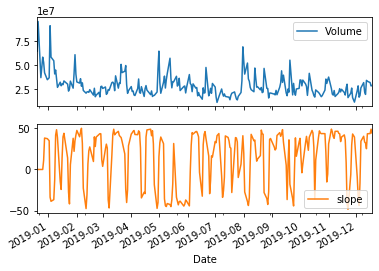

In [24]:
df.iloc[:,[4,6]].plot(subplots=True, layout=(2, 1))